In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv
/kaggle/input/aiffel-ds-3-house-prices/train.csv
/kaggle/input/aiffel-ds-3-house-prices/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/train.csv") 
test = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/test.csv")
submission = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv")



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

train_df=train.copy()
train_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [4]:
train_df.shape



(1168, 81)

In [5]:
test.shape

(292, 80)

In [6]:
train_df.dtypes.value_counts()


object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
train_df_obj=train_df.select_dtypes(include='object')
train_df_obj.shape

(1168, 43)

In [8]:
train_df_num=train_df.select_dtypes(exclude='object')
train_df_num.shape

(1168, 38)

In [9]:
test_obj=test.select_dtypes(include='object')
test_obj.shape


(292, 43)

In [10]:
test_num=test.select_dtypes(exclude='object')
test_num.shape

(292, 37)

In [11]:
corr=train_df_num.corr()
corr['SalePrice']

Id               0.003233
MSSubClass      -0.060677
LotFrontage      0.321389
LotArea          0.251558
OverallQual      0.785111
OverallCond     -0.059862
YearBuilt        0.501762
YearRemodAdd     0.504817
MasVnrArea       0.469261
BsmtFinSF1       0.379606
BsmtFinSF2      -0.005127
BsmtUnfSF        0.197267
TotalBsmtSF      0.595882
1stFlrSF         0.597729
2ndFlrSF         0.333176
LowQualFinSF    -0.007937
GrLivArea        0.710178
BsmtFullBath     0.209688
BsmtHalfBath    -0.005524
FullBath         0.577860
HalfBath         0.279331
BedroomAbvGr     0.186202
KitchenAbvGr    -0.132859
TotRmsAbvGrd     0.548795
Fireplaces       0.475965
GarageYrBlt      0.472533
GarageCars       0.632622
GarageArea       0.618311
WoodDeckSF       0.308081
OpenPorchSF      0.294805
EnclosedPorch   -0.110306
3SsnPorch        0.028724
ScreenPorch      0.133130
PoolArea         0.114399
MiscVal         -0.021824
MoSold           0.049252
YrSold          -0.018160
SalePrice        1.000000
Name: SalePr

In [12]:
corr['SalePrice'][abs(corr['SalePrice'])>=0.5]

OverallQual     0.785111
YearBuilt       0.501762
YearRemodAdd    0.504817
TotalBsmtSF     0.595882
1stFlrSF        0.597729
GrLivArea       0.710178
FullBath        0.577860
TotRmsAbvGrd    0.548795
GarageCars      0.632622
GarageArea      0.618311
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [13]:
high=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','TotRmsAbvGrd','GarageArea','SalePrice']
high

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'TotRmsAbvGrd',
 'GarageArea',
 'SalePrice']

<Axes: >

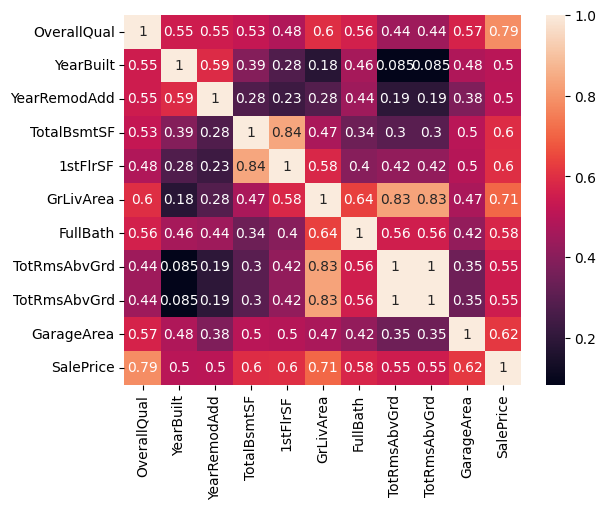

In [14]:
sns.heatmap(train_df_num[high].corr(),annot=True)

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

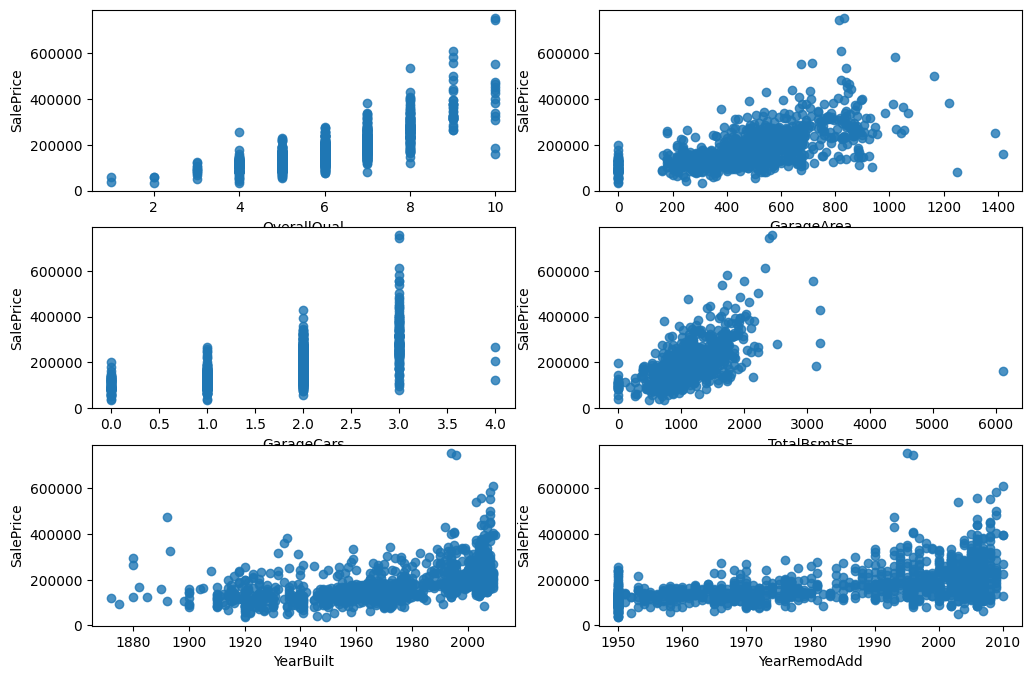

In [15]:
figure,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(12,8)
sns.regplot(data=train_df,x='OverallQual',y='SalePrice',fit_reg=False,ax=ax1)
sns.regplot(data=train_df,x='GarageArea',y='SalePrice',fit_reg=False,ax=ax2)
sns.regplot(data=train_df,x='GarageCars',y='SalePrice',fit_reg=False,ax=ax3)
sns.regplot(data=train_df,x='TotalBsmtSF',y='SalePrice',fit_reg=False,ax=ax4)
sns.regplot(data=train_df,x='YearBuilt',y='SalePrice',fit_reg=False,ax=ax5)
sns.regplot(data=train_df,x='YearRemodAdd',y='SalePrice',fit_reg=False,ax=ax6)

In [16]:
cols=train_df_num.columns
for i in cols:
    print(train_df_num[i].value_counts())

Id
968     1
1225    1
780     1
1105    1
1007    1
       ..
919     1
772     1
561     1
364     1
609     1
Name: count, Length: 1168, dtype: int64
MSSubClass
20     428
60     235
50     107
120     72
30      59
70      52
160     49
80      47
90      42
190     24
85      17
75      14
45      11
180      8
40       3
Name: count, dtype: int64
LotFrontage
60.0     118
70.0      54
80.0      52
50.0      44
75.0      42
        ... 
115.0      1
152.0      1
46.0       1
144.0      1
137.0      1
Name: count, Length: 104, dtype: int64
LotArea
9600     18
7200     17
6000     14
10800    12
9000     12
         ..
5604      1
6342      1
7259      1
7838      1
12168     1
Name: count, Length: 906, dtype: int64
OverallQual
5     319
6     296
7     267
8     129
4      92
9      33
10     15
3      12
2       3
1       2
Name: count, dtype: int64
OverallCond
5    658
6    200
7    162
8     61
4     42
9     21
3     20
2      3
1      1
Name: count, dtype: int64
YearBuilt
2006 

<Axes: xlabel='YrSold', ylabel='count'>

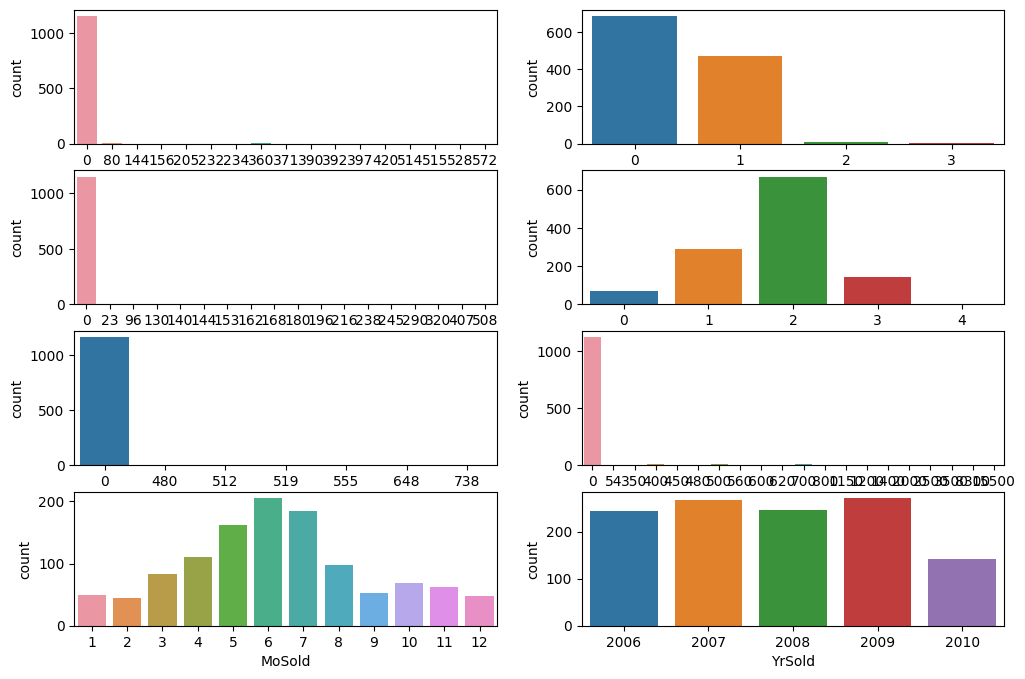

In [17]:
figure,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(nrows=4,ncols=2)
figure.set_size_inches(12,8)
sns.countplot(data=train_df,x='LowQualFinSF',ax=ax1)
sns.countplot(data=train_df,x='BsmtFullBath',ax=ax2)
sns.countplot(data=train_df,x='3SsnPorch',ax=ax3)
sns.countplot(data=train_df,x='GarageCars',ax=ax4)
sns.countplot(data=train_df,x='PoolArea',ax=ax5)
sns.countplot(data=train_df,x='MiscVal',ax=ax6)
sns.countplot(data=train_df,x='MoSold',ax=ax7)
sns.countplot(data=train_df,x='YrSold',ax=ax8)

In [18]:
train_df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      218
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       69
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [19]:
train_df_num.fillna(train_df_num.mean,inplace=True)


In [20]:
train_df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
train_df_obj.isnull().sum()

MSZoning            0
Street              0
Alley            1098
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        694
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           23
BsmtCond           23
BsmtExposure       24
BsmtFinType1       23
BsmtFinType2       24
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       545
GarageType         69
GarageFinish       69
GarageQual         69
GarageCond         69
PavedDrive          0
PoolQC           1162
Fence             941
MiscFeature      1120
SaleType            0
SaleCondition       0
dtype: int64

In [22]:
cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [23]:
for col in cols:
    frq=train_df_obj[col].value_counts().idxmax()
    train_df_obj.fillna(frq,inplace=True)

In [24]:
test_num.isnull().sum()

Id                0
MSSubClass        0
LotFrontage      41
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      12
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [25]:
test_num.fillna(test_num.mean,inplace=True)


In [26]:
test_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [27]:
test_obj.isnull().sum()

MSZoning           0
Street             0
Alley            271
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       178
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          14
BsmtCond          14
BsmtExposure      14
BsmtFinType1      14
BsmtFinType2      14
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      145
GarageType        12
GarageFinish      12
GarageQual        12
GarageCond        12
PavedDrive         0
PoolQC           291
Fence            238
MiscFeature      286
SaleType           0
SaleCondition      0
dtype: int64

In [28]:
cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [29]:
for col in cols:
    frq=test_obj[col].value_counts().idxmax()
    test_obj.fillna(frq,inplace=True)

In [30]:
test_obj.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [31]:
train_df_num['TotalSF']=train_df_num['TotalBsmtSF']+train_df_num['1stFlrSF']+train_df_num['2ndFlrSF' ]
train_df_num[['TotalSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']]

,TotalSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,2196,1098,1098,0
1,2400,1200,1200,0
2,2249,1112,1137,0
3,3388,1694,1694,0
4,1596,672,672,252
...,...,...,...,...
1163,3444,1362,1362,720
1164,3405,1517,1888,0
1165,3182,1581,1601,0
1166,3036,1518,1518,0


In [32]:
train_df_num[['SalePrice','TotalSF']].corr()

,SalePrice,TotalSF
SalePrice,1.00000,0.76918
TotalSF,0.76918,1.00000


In [33]:
train_df_obj_dummies=pd.get_dummies(train_df_obj,drop_first=True)
train_df_obj_dummies.shape

(1168, 220)